In [1]:
from contractions import contractions_dict

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [3]:
def expand_contractions(text, contraction_map=None):
    if contraction_map is None:
        contraction_map = contractions_dict

    # Using regex for getting all contracted words
    contractions_keys = '|'.join(re.escape(key) for key in contraction_map.keys())
    contractions_pattern = re.compile(f'({contractions_keys})', flags=re.DOTALL)

    expanded_text = contractions_pattern.sub(lambda match: contraction_map.get(match.group(0), match.group(0)), text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def 

'you all cannot expand contractions id think'

In [4]:
entertainment = pd.read_csv('data/BBCNewsSummaryCSV/entertainment_data.csv') 
sport = pd.read_csv('data/BBCNewsSummaryCSV/sport_data.csv')
tech = pd.read_csv('data/BBCNewsSummaryCSV/tech_data.csv')

In [5]:
print(entertainment.head())

            filename                                        newsarticle  \
0  entertainment_001  Gallery unveils interactive tree\n\nA Christma...   
1  entertainment_002  Jarre joins fairytale celebration\n\nFrench mu...   
2  entertainment_003  Musical treatment for Capra film\n\nThe classi...   
3  entertainment_004  Richard and Judy choose top books\n\nThe 10 au...   
4  entertainment_005  Poppins musical gets flying start\n\nThe stage...   

                                             summary  
0  The messages will be "unwrapped" by sculptor R...  
1  Bloom is to be formally presented with the Han...  
2  The classic film It's A Wonderful Life is to b...  
3  "It was very hard to follow last year's extrem...  
4  Mary Poppins was originally created by author ...  


In [6]:
training_dataset = pd.concat([entertainment,sport,tech], ignore_index=True)

In [7]:
training_dataset = training_dataset.sample(frac=1).reset_index(drop=True)

In [8]:
training_dataset.head()

,filename,newsarticle,summary
0,tech_190,First look at PlayStation 3 chip\n\nSome detai...,Some details of the chip inside Sony's PlaySta...
1,sport_509,Melzer shocks Agassi in San Jose\n\nSecond see...,Second seed Andre Agassi suffered a comprehens...
2,tech_072,Gadget growth fuels eco concerns\n\nTechnology...,But more awareness is needed about how and whe...
3,sport_195,Juninho demand for O'Neill talks\n\nJuninho's ...,"Hassel says Juninho, who has just bought a new..."
4,tech_393,Savvy searchers fail to spot ads\n\nInternet s...,Almost 50% of those questioned said they would...


In [9]:
def getSenLen(sentence):
    return len(sentence.split())

In [10]:
training_dataset['article_length'] = training_dataset['newsarticle'].apply(getSenLen)
training_dataset['summary_length'] = training_dataset['summary'].apply(getSenLen)

In [11]:
training_dataset

,filename,newsarticle,summary,article_length,summary_length
0,tech_190,First look at PlayStation 3 chip\n\nSome detai...,Some details of the chip inside Sony's PlaySta...,330,130
1,sport_509,Melzer shocks Agassi in San Jose\n\nSecond see...,Second seed Andre Agassi suffered a comprehens...,206,88
2,tech_072,Gadget growth fuels eco concerns\n\nTechnology...,But more awareness is needed about how and whe...,886,401
3,sport_195,Juninho demand for O'Neill talks\n\nJuninho's ...,"Hassel says Juninho, who has just bought a new...",410,188
4,tech_393,Savvy searchers fail to spot ads\n\nInternet s...,Almost 50% of those questioned said they would...,500,199
...,...,...,...,...,...
1293,sport_275,Beckham rules out management move\n\nReal Madr...,But Beckham revealed that his immediate priori...,254,133
1294,sport_259,Benitez deflects blame from Dudek\n\nLiverpool...,"Benitez said: ""It was difficult for Jerzy.Beni...",191,55
1295,entertainment_148,Pupils to get anti-piracy lessons\n\nLessons o...,"Music piracy, including illegally swapping mus...",432,188
1296,sport_100,Mido makes third apology\n\nAhmed 'Mido' Hossa...,Shalaby earlier said that after an apology Mid...,373,157


In [12]:
training_dataset.describe()

,article_length,summary_length
count,1298.000000,1298.000000
mean,383.246533,165.270416
std,241.582739,109.734916
min,114.000000,42.000000
25%,234.000000,99.250000
50%,321.000000,137.000000
75%,464.000000,202.750000
max,3482.000000,1706.000000


Text(0.5, 1.0, 'Boxplot of Summary Lengths')

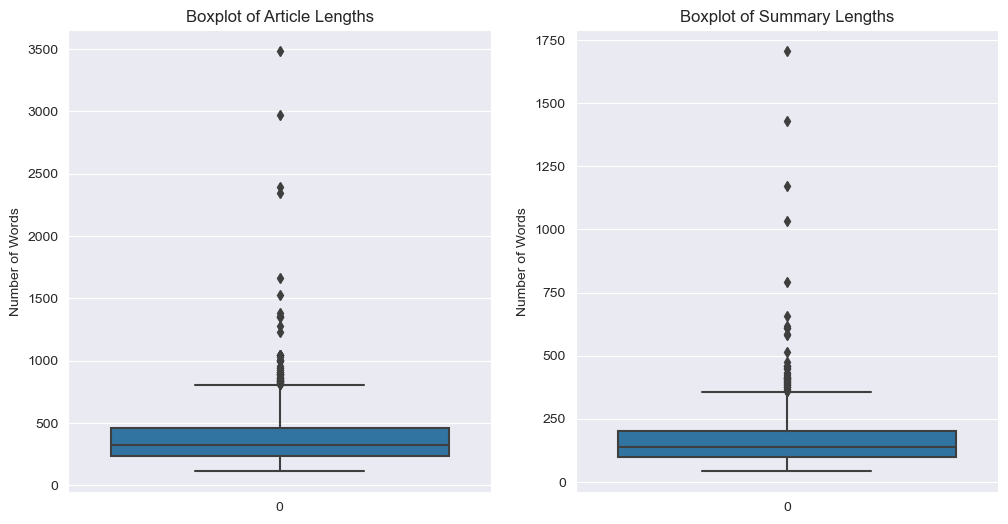

In [13]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for the articles' number of words
sns.boxplot(training_dataset["article_length"], ax=axes[0])
axes[0].set_ylabel("Number of Words")
axes[0].set_title("Boxplot of Article Lengths")

# Plot for the summaries' number of words
sns.boxplot(training_dataset["summary_length"], ax=axes[1])
axes[1].set_ylabel("Number of Words")
axes[1].set_title("Boxplot of Summary Lengths")


In [14]:
# Get statistics for the articles boxplot
lines_articles = axes[0].lines[:6]
articles_stats = [line.get_ydata()[0] for line in lines_articles]
Q1_articles, Q3_articles, lower_whisker_articles, upper_whisker_articles, median_articles = articles_stats[:5]

# Get statistics for the summaries boxplot
lines_summaries = axes[1].lines[:6]
summaries_stats = [line.get_ydata()[0] for line in lines_summaries]
Q1_summaries, Q3_summaries, lower_whisker_summaries, upper_whisker_summaries, median_summaries = summaries_stats[:5]

In [15]:
training_dataset = training_dataset[(training_dataset['summary_length'] <= upper_whisker_summaries) & (training_dataset['article_length'] <= upper_whisker_articles)]

In [16]:
training_dataset.head()

,filename,newsarticle,summary,article_length,summary_length
0,tech_190,First look at PlayStation 3 chip\n\nSome detai...,Some details of the chip inside Sony's PlaySta...,330,130
1,sport_509,Melzer shocks Agassi in San Jose\n\nSecond see...,Second seed Andre Agassi suffered a comprehens...,206,88
3,sport_195,Juninho demand for O'Neill talks\n\nJuninho's ...,"Hassel says Juninho, who has just bought a new...",410,188
4,tech_393,Savvy searchers fail to spot ads\n\nInternet s...,Almost 50% of those questioned said they would...,500,199
5,tech_132,US duo in first spam conviction\n\nA brother a...,Jaynes was also found guilty of breaking a sta...,278,135


In [17]:
df = training_dataset